In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet 



In [2]:
avo_data=pd.read_csv('avocado.csv')

In [3]:
avo_data

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
avo_data.head(100)

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,43,3/1/2015,0.99,512532.44,441544.00,21183.70,347.78,49456.96,32180.90,17273.38,2.68,conventional,2015,Atlanta
96,44,2/22/2015,1.10,431308.56,369316.29,18324.76,237.47,43430.04,33423.74,10006.30,0.00,conventional,2015,Atlanta
97,45,2/15/2015,1.06,427391.28,364446.77,17420.41,638.18,44885.92,26727.66,18158.26,0.00,conventional,2015,Atlanta
98,46,2/8/2015,1.03,433883.91,377256.38,17162.50,524.85,38940.18,18044.41,20895.77,0.00,conventional,2015,Atlanta


In [5]:
avo_data.tail(10)

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,3/11/2018,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,3/4/2018,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2/25/2018,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2/18/2018,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2/11/2018,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,1/7/2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
avo_data.type

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

In [7]:
avo_data.shape

(18249, 14)

In [8]:
avo_data.count()

index           18249
Date            18249
AveragePrice    18249
Total Volume    18249
PLU_4046        18249
PLU_4225        18249
PLU_4770        18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

In [9]:
avo_data.isna().count()

index           18249
Date            18249
AveragePrice    18249
Total Volume    18249
PLU_4046        18249
PLU_4225        18249
PLU_4770        18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

In [10]:
avo_data=avo_data.sort_values ('Date')
avo_data

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6039,52,1/1/2017,1.21,217051.50,47765.32,94571.69,15036.44,59678.05,45920.26,13711.12,46.67,conventional,2017,Charlotte
5827,52,1/1/2017,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,conventional,2017,Boise
6516,52,1/1/2017,1.35,235430.29,41800.77,136109.66,420.83,57099.03,52817.14,4281.89,0.00,conventional,2017,HarrisburgScranton
15323,52,1/1/2017,1.58,5948.66,772.98,2724.28,0.00,2451.40,2273.79,177.61,0.00,organic,2017,Columbus
15853,52,1/1/2017,1.24,3707.67,245.43,38.31,2.39,3421.54,910.00,2511.54,0.00,organic,2017,Jacksonville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,16,9/6/2015,1.62,2794.65,321.17,1731.98,0.00,741.50,413.33,328.17,0.00,organic,2015,Indianapolis
2200,16,9/6/2015,1.54,646810.20,154276.07,384033.22,30732.28,77768.63,76963.49,805.14,0.00,conventional,2015,SanFrancisco
10182,16,9/6/2015,2.07,2016.06,1096.25,55.10,8.04,856.67,856.67,0.00,0.00,organic,2015,Jacksonville
900,16,9/6/2015,1.27,281256.19,3976.35,221997.70,497.89,54784.25,52839.06,1945.19,0.00,conventional,2015,HartfordSpringfield


In [11]:
avo_data.sort_values('AveragePrice')

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15261,43,3/5/2017,0.44,64057.04,223.84,4748.88,0.00,59084.32,638.68,58445.64,0.00,organic,2017,CincinnatiDayton
7412,47,2/5/2017,0.46,2200550.27,1200632.86,531226.65,18324.93,450365.83,113752.17,330583.10,6030.56,conventional,2017,PhoenixTucson
15473,43,3/5/2017,0.48,50890.73,717.57,4138.84,0.00,46034.32,1385.06,44649.26,0.00,organic,2017,Detroit
15262,44,2/26/2017,0.49,44024.03,252.79,4472.68,0.00,39298.56,600.00,38698.56,0.00,organic,2017,CincinnatiDayton
1716,0,12/27/2015,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16720,18,8/27/2017,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.00,organic,2017,RaleighGreensboro
16055,42,3/12/2017,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.00,organic,2017,MiamiFtLauderdale
14124,7,11/6/2016,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.00,organic,2016,SanFrancisco
17428,37,4/16/2017,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.00,organic,2017,Tampa


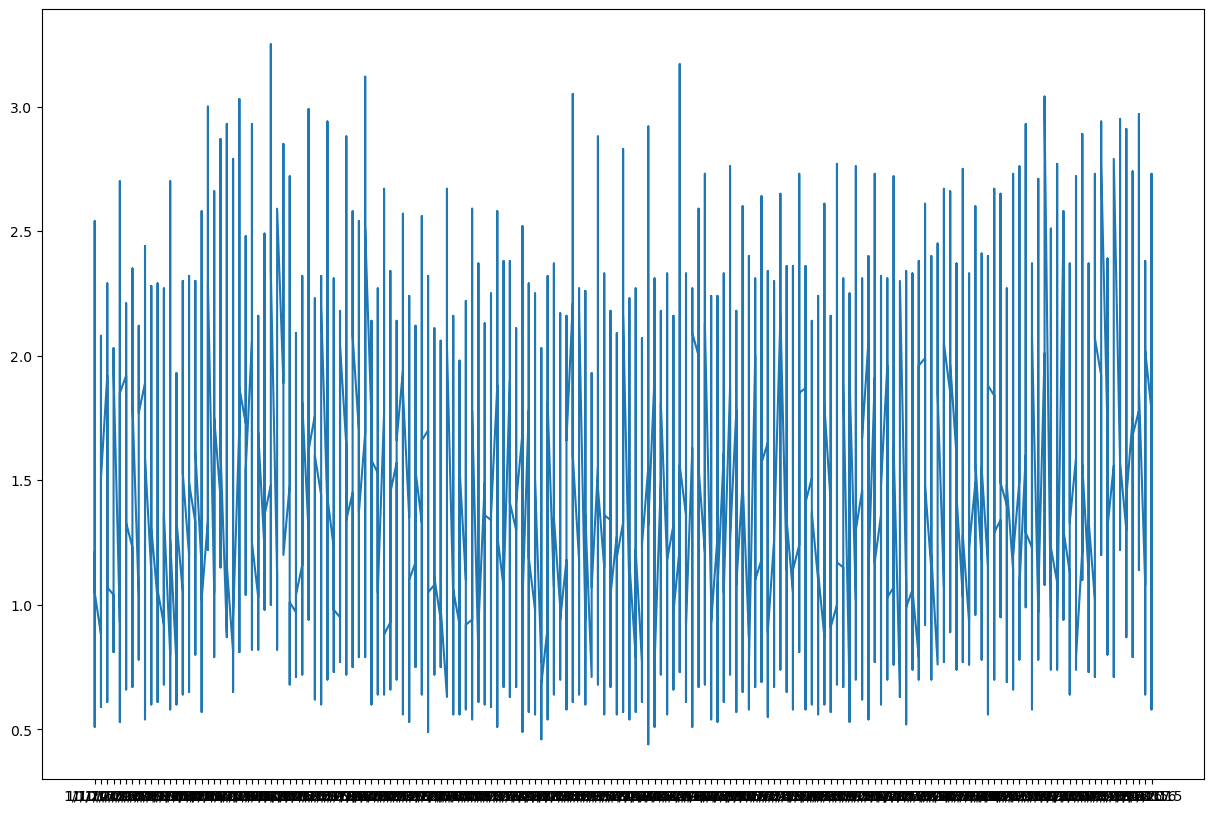

In [12]:
plt.figure(figsize=(15,10))
plt.plot(avo_data['Date'],avo_data['AveragePrice'])

['Charlotte' 'Boise' 'HarrisburgScranton' 'Columbus' 'Jacksonville'
 'Sacramento' 'Seattle' 'HartfordSpringfield' 'CincinnatiDayton'
 'Syracuse' 'Northeast' 'LasVegas' 'Southeast' 'SanFrancisco'
 'DallasFtWorth' 'Chicago' 'NewOrleansMobile' 'NorthernNewEngland'
 'SanDiego' 'Houston' 'BaltimoreWashington' 'Nashville' 'California'
 'SouthCentral' 'Indianapolis' 'TotalUS' 'SouthCarolina' 'Philadelphia'
 'Spokane' 'StLouis' 'Detroit' 'GreatLakes' 'RichmondNorfolk'
 'GrandRapids' 'NewYork' 'Roanoke' 'PhoenixTucson' 'Denver' 'Boston'
 'BuffaloRochester' 'LosAngeles' 'Portland' 'RaleighGreensboro' 'Midsouth'
 'Plains' 'Pittsburgh' 'Louisville' 'Tampa' 'Albany' 'MiamiFtLauderdale'
 'West' 'Orlando' 'WestTexNewMexico' 'Atlanta']


<Axes: xlabel='region', ylabel='count'>

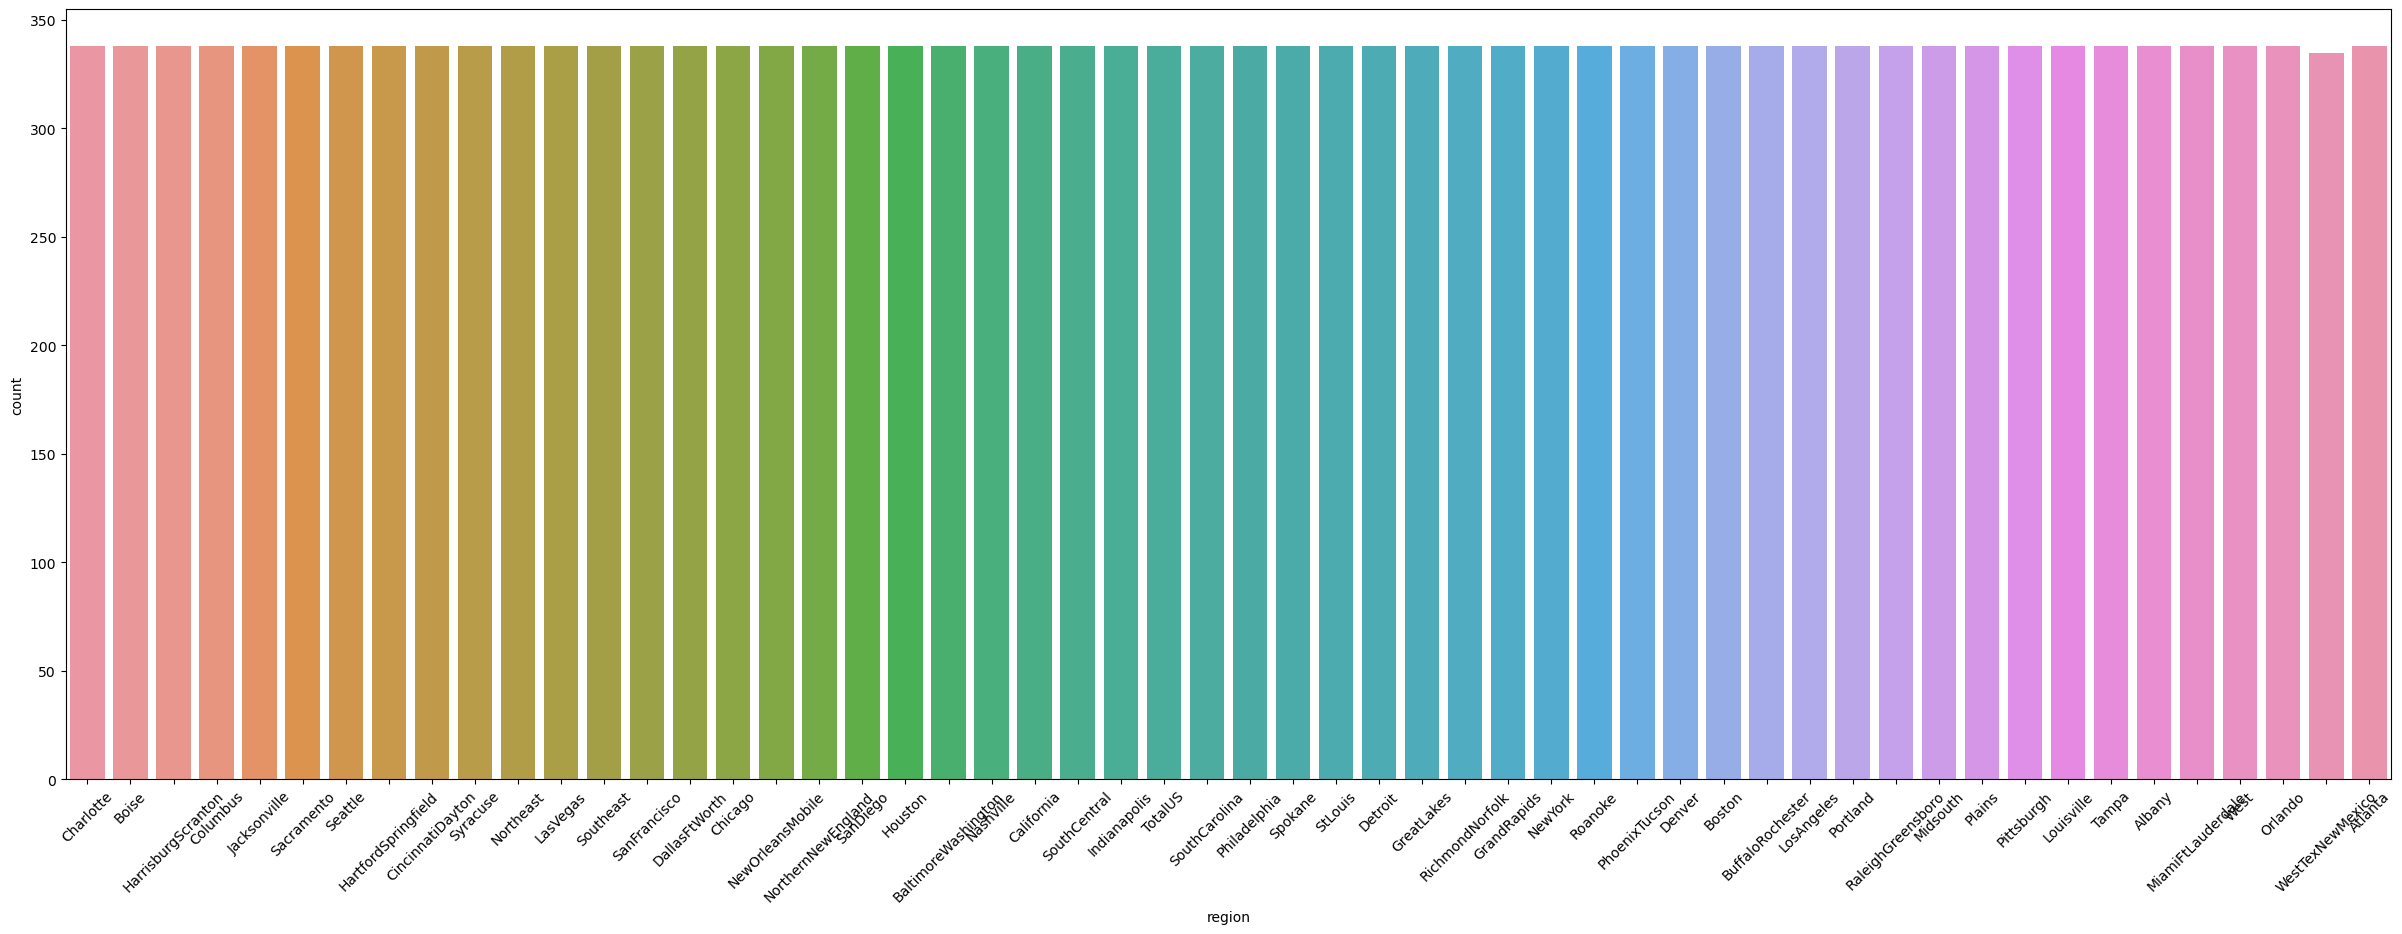

In [13]:
print(avo_data['region'].unique())
plt.figure(figsize=(30,10))
plt.xticks(rotation=(45))

sns.countplot(x='region', data=avo_data)


<Axes: xlabel='year', ylabel='count'>

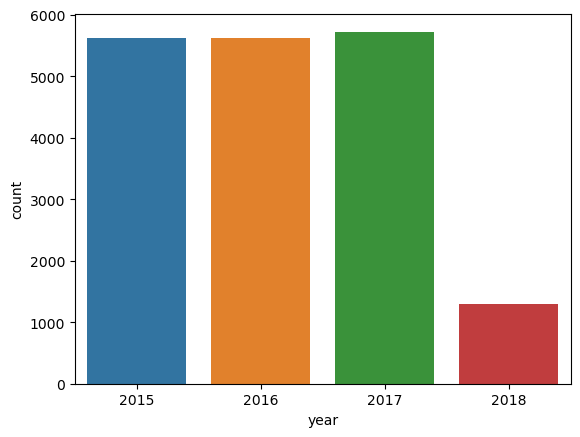

In [14]:
sns.countplot(x='year',data=avo_data)

In [15]:
avo_prophet_data= avo_data[['Date','AveragePrice']]
avo_prophet_data

,Date,AveragePrice
6039,1/1/2017,1.21
5827,1/1/2017,0.92
6516,1/1/2017,1.35
15323,1/1/2017,1.58
15853,1/1/2017,1.24
...,...,...
10130,9/6/2015,1.62
2200,9/6/2015,1.54
10182,9/6/2015,2.07
900,9/6/2015,1.27


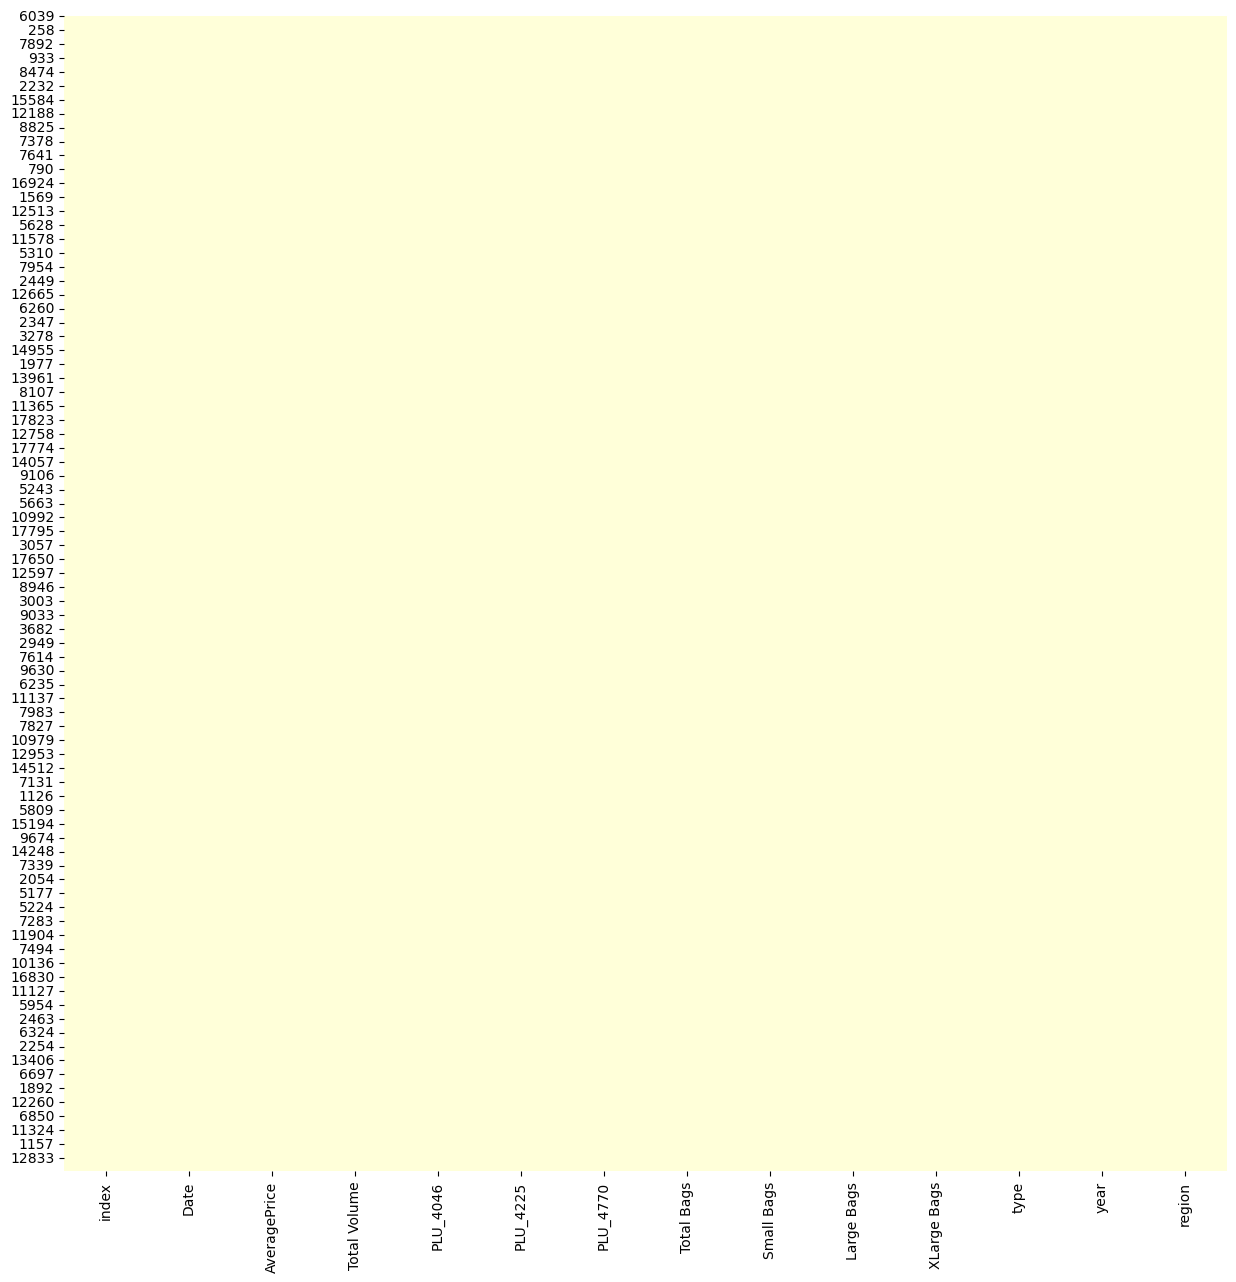

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(avo_data.isna(), cbar=False, cmap='YlGnBu')
plt.show()

In [17]:
avo_data

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6039,52,1/1/2017,1.21,217051.50,47765.32,94571.69,15036.44,59678.05,45920.26,13711.12,46.67,conventional,2017,Charlotte
5827,52,1/1/2017,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,conventional,2017,Boise
6516,52,1/1/2017,1.35,235430.29,41800.77,136109.66,420.83,57099.03,52817.14,4281.89,0.00,conventional,2017,HarrisburgScranton
15323,52,1/1/2017,1.58,5948.66,772.98,2724.28,0.00,2451.40,2273.79,177.61,0.00,organic,2017,Columbus
15853,52,1/1/2017,1.24,3707.67,245.43,38.31,2.39,3421.54,910.00,2511.54,0.00,organic,2017,Jacksonville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,16,9/6/2015,1.62,2794.65,321.17,1731.98,0.00,741.50,413.33,328.17,0.00,organic,2015,Indianapolis
2200,16,9/6/2015,1.54,646810.20,154276.07,384033.22,30732.28,77768.63,76963.49,805.14,0.00,conventional,2015,SanFrancisco
10182,16,9/6/2015,2.07,2016.06,1096.25,55.10,8.04,856.67,856.67,0.00,0.00,organic,2015,Jacksonville
900,16,9/6/2015,1.27,281256.19,3976.35,221997.70,497.89,54784.25,52839.06,1945.19,0.00,conventional,2015,HartfordSpringfield


In [18]:
avo_data.Date = pd.to_datetime(avo_data['Date'], format='%m/%d/%Y')


# dat=pd.to_datetime(avo_data['Date'],format=' %m/%d/%Y')

In [19]:
avo_data.Date

6039    2017-01-01
5827    2017-01-01
6516    2017-01-01
15323   2017-01-01
15853   2017-01-01
           ...    
10130   2015-09-06
2200    2015-09-06
10182   2015-09-06
900     2015-09-06
1836    2015-09-06
Name: Date, Length: 18249, dtype: datetime64[ns]

In [20]:
avo_data

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6039,52,2017-01-01,1.21,217051.50,47765.32,94571.69,15036.44,59678.05,45920.26,13711.12,46.67,conventional,2017,Charlotte
5827,52,2017-01-01,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,conventional,2017,Boise
6516,52,2017-01-01,1.35,235430.29,41800.77,136109.66,420.83,57099.03,52817.14,4281.89,0.00,conventional,2017,HarrisburgScranton
15323,52,2017-01-01,1.58,5948.66,772.98,2724.28,0.00,2451.40,2273.79,177.61,0.00,organic,2017,Columbus
15853,52,2017-01-01,1.24,3707.67,245.43,38.31,2.39,3421.54,910.00,2511.54,0.00,organic,2017,Jacksonville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,16,2015-09-06,1.62,2794.65,321.17,1731.98,0.00,741.50,413.33,328.17,0.00,organic,2015,Indianapolis
2200,16,2015-09-06,1.54,646810.20,154276.07,384033.22,30732.28,77768.63,76963.49,805.14,0.00,conventional,2015,SanFrancisco
10182,16,2015-09-06,2.07,2016.06,1096.25,55.10,8.04,856.67,856.67,0.00,0.00,organic,2015,Jacksonville
900,16,2015-09-06,1.27,281256.19,3976.35,221997.70,497.89,54784.25,52839.06,1945.19,0.00,conventional,2015,HartfordSpringfield


In [21]:
avo_data['AveragePrice'].value_counts()
#avo_data['Primary Type'].value_counts()


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.12      1
2.68      1
2.78      1
3.03      1
2.97      1
Name: AveragePrice, Length: 259, dtype: int64

In [22]:
avo_data['AveragePrice'].value_counts().iloc[:20]


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
0.98    189
1.19    188
1.36    187
1.59    186
1.48    185
0.99    185
1.43    185
1.23    181
1.49    180
1.14    180
1.03    179
1.05    178
1.40    175
1.17    174
1.04    174
Name: AveragePrice, dtype: int64

In [23]:
avo_data['AveragePrice'].value_counts().index


Float64Index([1.15, 1.18, 1.08, 1.26, 1.13, 0.98, 1.19, 1.36, 1.59, 1.48,
              ...
              0.48, 0.44,  2.9, 3.05, 0.46, 3.12, 2.68, 2.78, 3.03, 2.97],
             dtype='float64', length=259)

In [24]:
avo_data['AveragePrice'].value_counts().iloc[:20].index


Float64Index([1.15, 1.18, 1.08, 1.26, 1.13, 0.98, 1.19, 1.36, 1.59, 1.48, 0.99,
              1.43, 1.23, 1.49, 1.14, 1.03, 1.05,  1.4, 1.17, 1.04],
             dtype='float64')

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(avo_data['AveragePrice'])

IndexError: Inconsistent shape between the condition and the input (got (18249, 1) and (18249,))

<Figure size 1500x1500 with 0 Axes>

In [ ]:
avo_prophet_data=avo_prophet_data.rename(columns={'Date':'ds','AveragePrice':'y'})

In [ ]:
avo_prophet_data

,ds,y
1143,2015-01-04,0.80
1611,2015-01-04,1.05
9957,2015-01-04,1.54
10061,2015-01-04,2.32
10113,2015-01-04,1.22
...,...,...
18165,2018-03-25,1.59
17877,2018-03-25,1.46
8658,2018-03-25,1.18
8526,2018-03-25,1.39


In [ ]:
m=Prophet()

In [ ]:
m.fit(avo_prophet_data)

08:56:49 - cmdstanpy - INFO - Chain [1] start processing
08:56:56 - cmdstanpy - INFO - Chain [1] done processing


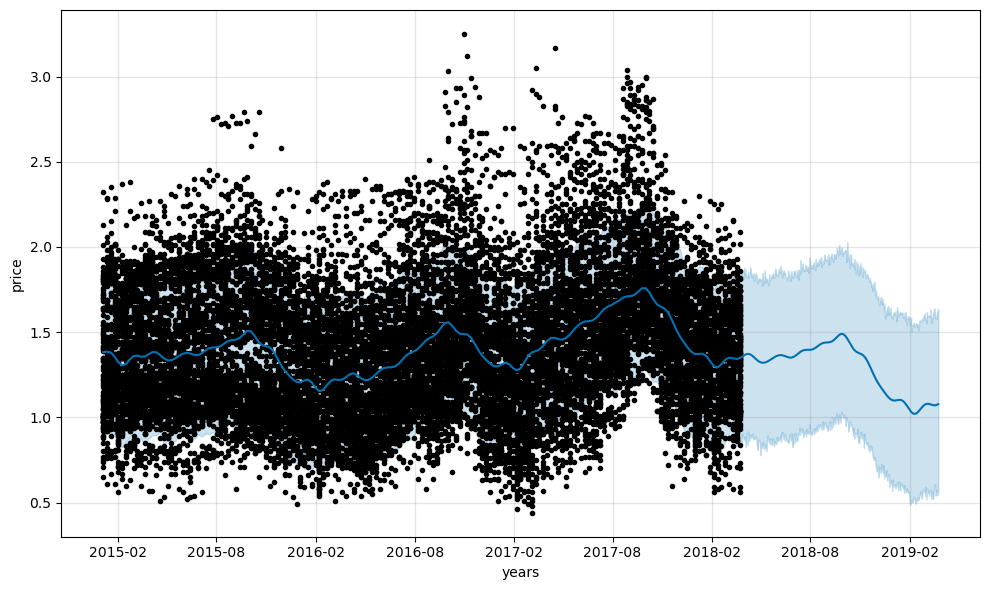

In [ ]:
future=m.make_future_dataframe(periods=365)       
forcaster=m.predict(future)
forcaster
figure=m.plot(forcaster,xlabel='years',ylabel='price')

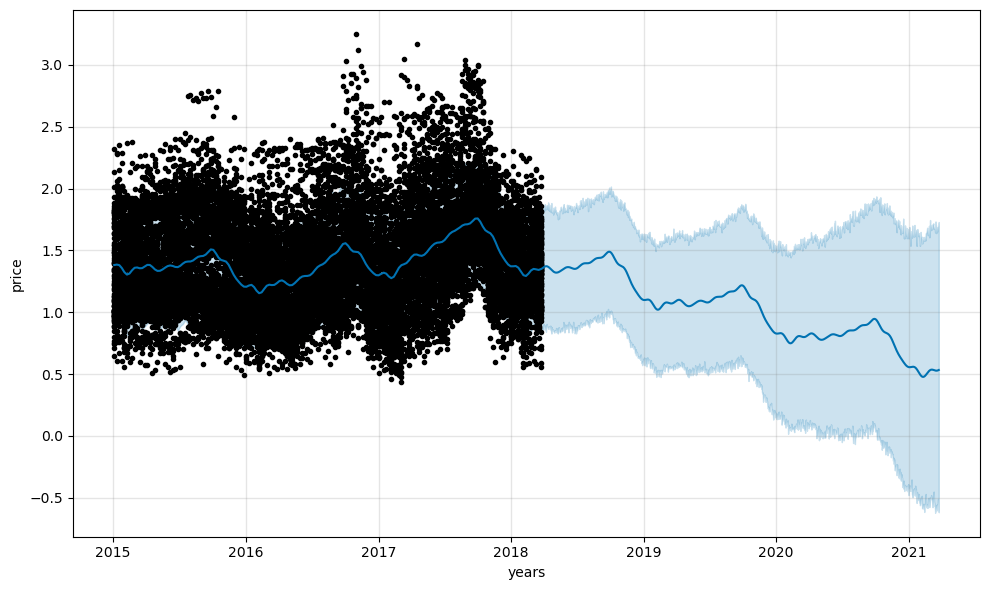

In [ ]:
future=m.make_future_dataframe(periods=1095)       
forcaster=m.predict(future)
forcaster
figure=m.plot(forcaster,xlabel='years',ylabel='price')

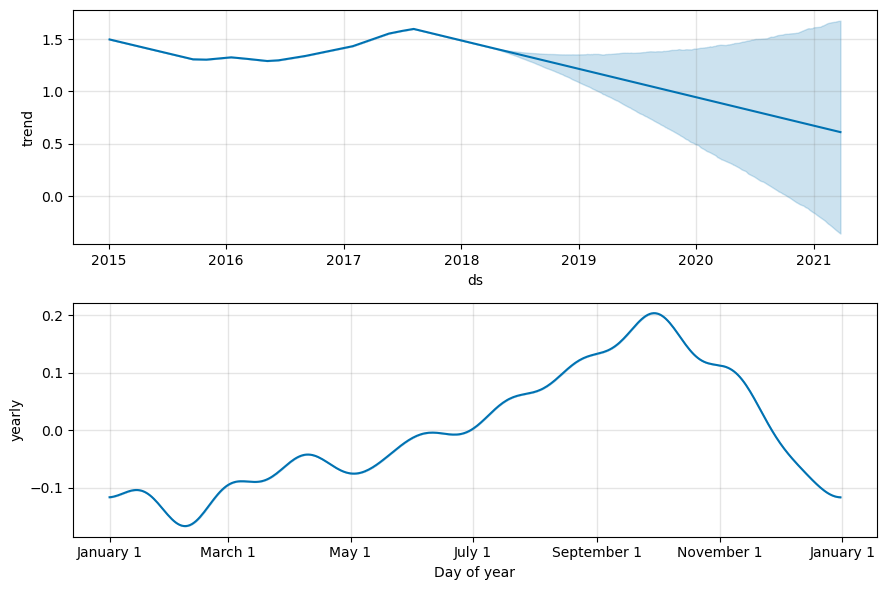

In [ ]:
figure=m.plot_components(forcaster)

In [ ]:
avo_data=pd.read_csv('avocado.csv')
avo_data_sample=avo_data[avo_data['region']=='West']

In [ ]:
avo_data_sample

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,12/27/2015,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,12/20/2015,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,12/13/2015,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,12/6/2015,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,11/29/2015,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2/4/2018,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,1/28/2018,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,1/21/2018,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,1/14/2018,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [ ]:
avo_data_sample=avo_data_sample.sort_values('Date')

In [ ]:
avo_data_sample

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8424,52,1/1/2017,0.79,7360925.84,2100350.66,1976304.53,123652.12,3160618.53,2299700.47,857388.28,3529.78,conventional,2017,West
17549,52,1/1/2017,1.19,189700.70,20783.06,35758.45,36.46,133122.73,33998.50,99124.23,0.00,organic,2017,West
5562,50,1/10/2016,0.77,7438252.93,2530745.31,2193263.08,175472.09,2538772.45,1418302.47,1118953.54,1516.44,conventional,2016,West
14687,50,1/10/2016,1.09,255091.59,26496.60,71724.89,119.85,156750.25,21108.02,135642.23,0.00,organic,2016,West
2754,50,1/11/2015,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,17,9/3/2017,2.52,143490.06,19509.00,32862.27,50.28,91068.51,51643.01,39324.06,101.44,organic,2017,West
5528,16,9/4/2016,0.92,6676702.06,2858767.17,1348831.14,111324.84,2357778.91,1344665.71,1012172.25,940.95,conventional,2016,West
14653,16,9/4/2016,1.61,177083.68,42575.46,60202.23,527.53,73778.46,37977.13,35801.33,0.00,organic,2016,West
2720,16,9/6/2015,0.93,5900751.95,2682938.17,2086229.79,124722.73,1006861.26,696240.23,310568.88,52.15,conventional,2015,West


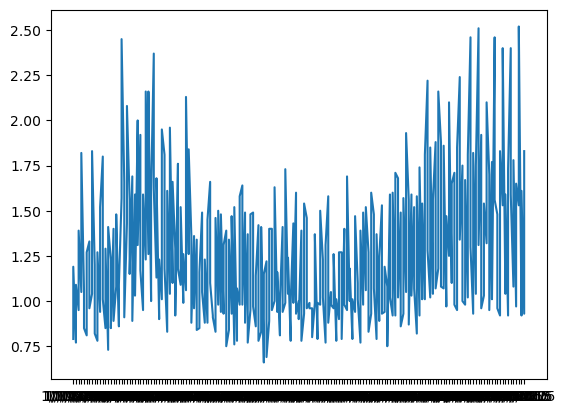

In [ ]:
plt.plot(avo_data_sample['Date'],avo_data_sample['AveragePrice'])

In [26]:
avo_data_sample=avo_data_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

NameError: name 'avo_data_sample' is not defined

In [27]:
avo_data_sample

NameError: name 'avo_data_sample' is not defined

In [28]:
m=Prophet()
m.fit(avo_data_sample)

NameError: name 'avo_data_sample' is not defined

In [ ]:
future=m.make_future_dataframe(periods=365)
forcast=m.predict((future))
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.252876,0.655999,1.502443,1.252876,1.252876,-0.186564,-0.186564,-0.186564,-0.186564,-0.186564,-0.186564,0.0,0.0,0.0,1.066312
1,2015-01-11,1.251801,0.664662,1.518747,1.251801,1.251801,-0.168071,-0.168071,-0.168071,-0.168071,-0.168071,-0.168071,0.0,0.0,0.0,1.083730
2,2015-01-18,1.250727,0.634477,1.539179,1.250727,1.250727,-0.158980,-0.158980,-0.158980,-0.158980,-0.158980,-0.158980,0.0,0.0,0.0,1.091747
3,2015-01-25,1.249652,0.646704,1.520214,1.249652,1.249652,-0.170997,-0.170997,-0.170997,-0.170997,-0.170997,-0.170997,0.0,0.0,0.0,1.078655
4,2015-02-01,1.248577,0.615414,1.485669,1.248577,1.248577,-0.192692,-0.192692,-0.192692,-0.192692,-0.192692,-0.192692,0.0,0.0,0.0,1.055885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.723666,1.081058,1.981200,1.695371,1.751140,-0.204303,-0.204303,-0.204303,-0.204303,-0.204303,-0.204303,0.0,0.0,0.0,1.519363
530,2019-03-22,1.724225,1.103701,1.932297,1.695818,1.751883,-0.199286,-0.199286,-0.199286,-0.199286,-0.199286,-0.199286,0.0,0.0,0.0,1.524939
531,2019-03-23,1.724783,1.131292,1.985934,1.696265,1.752615,-0.193708,-0.193708,-0.193708,-0.193708,-0.193708,-0.193708,0.0,0.0,0.0,1.531076
532,2019-03-24,1.725342,1.075614,1.923186,1.696712,1.753337,-0.187672,-0.187672,-0.187672,-0.187672,-0.187672,-0.187672,0.0,0.0,0.0,1.537670


In [29]:
figure=m.plot(forcast, xlabel='Date',ylabel='AveragePrice')

NameError: name 'forcast' is not defined

In [30]:
figure=m.plot_components(forcast)

NameError: name 'forcast' is not defined